# imagesOct18

In [2]:
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np
import os
from os.path import expanduser

camSavePath = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/imagesOct18')
velSavePath = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/velOct18')

camTimeStampArray = np.load(os.path.join(camSavePath, "camTimeStampArray.npy"))
velTimeStampArray = np.load(os.path.join(velSavePath, "velTimeStampArray.npy"))

# Plot Vel

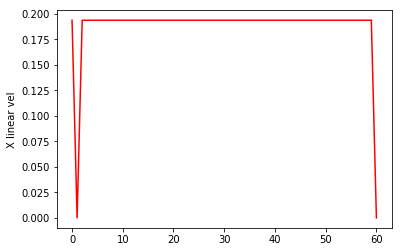

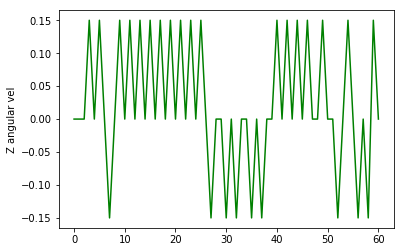

In [3]:
x = []
z = []

for i in range(1,velTimeStampArray.shape[0]+1):
    #print Vel
    velFileName =  os.path.join(velSavePath, "vel_%s.npy" % (i))
    vel = np.load(velFileName)
    x.append(vel[0])
    z.append(vel[1])
    #print("Vel:" , vel)

    camFileName =  os.path.join(camSavePath, "image_%s.npy" % (i))
    image = np.load(camFileName)
    #print(image.shape)

    #Show image
    #plt.imshow(image[:,:,::-1])
    #plt.show()

    
plt.plot(x, 'r-')
plt.ylabel("X linear vel")
plt.show()

plt.plot(z, 'g-')
plt.ylabel("Z angular vel")
plt.show()
#print "Vel x: "+ "\n" + str(x) + "\n"
#print "Vel z: "+"\n" + str(z) + "\n"

# imagesOct23

In [3]:
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np
import os
from os.path import expanduser

camSavePath = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/imagesOct23')
velSavePath = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/velOct23')

camTimeStampArray = np.load(os.path.join(camSavePath, "camTimeStampArray.npy"))
velTimeStampArray = np.load(os.path.join(velSavePath, "velTimeStampArray.npy"))

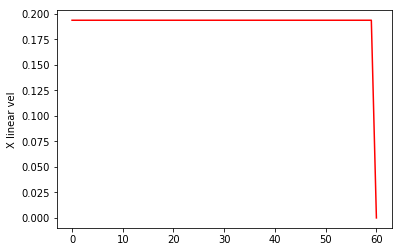

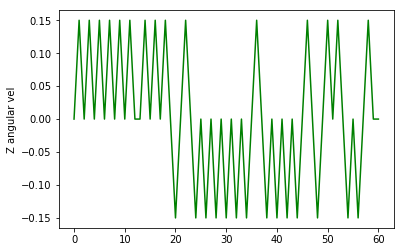

In [4]:
x = []
z = []

for i in range(1,velTimeStampArray.shape[0]+1):
    #print Vel
    velFileName =  os.path.join(velSavePath, "vel_%s.npy" % (i))
    vel = np.load(velFileName)
    x.append(vel[0])
    z.append(vel[1])
    #print("Vel:" , vel)

    camFileName =  os.path.join(camSavePath, "image_%s.npy" % (i))
    image = np.load(camFileName)
    #print(image.shape)

    #Show image
    #plt.imshow(image[:,:,::-1])
    #plt.show()

    
plt.plot(x, 'r-')
plt.ylabel("X linear vel")
plt.show()

plt.plot(z, 'g-')
plt.ylabel("Z angular vel")
plt.show()
#print "Vel x: "+ "\n" + str(x) + "\n"
#print "Vel z: "+"\n" + str(z) + "\n"

# Try 1  - failed

In [126]:
convensionMatrix =  np.zeros((camTimeStampArray.shape[0], 2),  dtype=int)
convensionMatrix[:,0] = np.arange(0,camTimeStampArray.shape[0])

for i in xrange(0, convensionMatrix.shape[0]):
    
    camTimeStamp = camTimeStampArray[i]
    
    velStampIndex = np.argmin(np.absolute(camTimeStamp - velTimeStampArray))
    
    convensionMatrix[i,1]  = velStampIndex

convensionMatrix

# esta mal ya que esta teniendo en cuneta solo la proximidad entre los tiempos en que fueron capturados 
#los datos. Lo cual esta mal, ya que se debe tener en cuenta tambien que cada valor de velocidad se almecena cuando hay un cmabio en la misma

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ..., 
       [3218,   60],
       [3219,   60],
       [3220,   60]])

# Try 2 

In [5]:
convensionMatrixVel =  np.zeros((velTimeStampArray.shape[0]) ,  dtype=int)

for i in xrange(0, velTimeStampArray.shape[0]):
    
    velTimeStamp = velTimeStampArray[i]
    velStampIndex = np.argmin(np.absolute(velTimeStamp - camTimeStampArray))
    convensionMatrixVel[i]  = velStampIndex
    
convensionMatrixVel

#interpolar los valores de las posiciones intermedias del arreglo full con el valor de la posicion anterior del sigte array

array([ 207,  434,  466,  485,  502,  533,  560,  569,  583,  609,  626,
        643,  663,  694,  704,  790,  804,  847, 1030, 1042, 1057, 1072,
       1092, 1116, 1513, 1523, 1561, 1594, 1633, 1654, 1679, 1755, 1770,
       1816, 1846, 1894, 1960, 1972, 2118, 2143, 2161, 2195, 2220, 2246,
       2269, 2318, 2342, 2380, 2400, 2505, 2897, 2915, 2949, 2976, 3249,
       3266, 3366, 3381, 3659, 3689, 3898])

In [6]:
convensionMatrix =  np.zeros((camTimeStampArray.shape[0], 2),  dtype=int)
convensionMatrix[:,0] = np.arange(0,camTimeStampArray.shape[0])

print("Shape", convensionMatrix.shape)
for i in xrange(0, camTimeStampArray.shape[0]):
    
    if i in convensionMatrixVel[:]:
        #print ("entro:" , i) 
        convensionMatrix[i,1]  = np.where( i == convensionMatrixVel )[0][0]
    else:
        convensionMatrix[i,1]  = convensionMatrix[i-1,1]   

('Shape', (3991, 2))


In [7]:
convensionMatrix

array([[   0,    0],
       [   1,    0],
       [   2,    0],
       ..., 
       [3988,   60],
       [3989,   60],
       [3990,   60]])

# Guardar los datos a partir de cuando hay movinmiento... 
Como cargar las 3K feat maps en memoria para entrenar el SVR?

In [8]:
movingconvensionMatrix= convensionMatrix[convensionMatrixVel[0]:]

print movingconvensionMatrix.shape

movingconvensionMatrix

(3784, 2)


array([[ 207,    0],
       [ 208,    0],
       [ 209,    0],
       ..., 
       [3988,   60],
       [3989,   60],
       [3990,   60]])

In [9]:
#Save 

date = "Oct23"  #"Oct18"

In [10]:
imageVelDatasetPath = os.path.join(expanduser("~"),'Traversability_project/imageVelDataset/')
fileName = os.path.join(imageVelDatasetPath, "convensionMatrix_%s" % (date))
np.save(fileName, movingconvensionMatrix)

In [11]:
for i in xrange(0, movingconvensionMatrix.shape[0]):
    print ("Image name" , movingconvensionMatrix[i,0])
    print ("Vel name" , movingconvensionMatrix[i,1]) # + "\n"    

('Image name', 207)
('Vel name', 0)
('Image name', 208)
('Vel name', 0)
('Image name', 209)
('Vel name', 0)
('Image name', 210)
('Vel name', 0)
('Image name', 211)
('Vel name', 0)
('Image name', 212)
('Vel name', 0)
('Image name', 213)
('Vel name', 0)
('Image name', 214)
('Vel name', 0)
('Image name', 215)
('Vel name', 0)
('Image name', 216)
('Vel name', 0)
('Image name', 217)
('Vel name', 0)
('Image name', 218)
('Vel name', 0)
('Image name', 219)
('Vel name', 0)
('Image name', 220)
('Vel name', 0)
('Image name', 221)
('Vel name', 0)
('Image name', 222)
('Vel name', 0)
('Image name', 223)
('Vel name', 0)
('Image name', 224)
('Vel name', 0)
('Image name', 225)
('Vel name', 0)
('Image name', 226)
('Vel name', 0)
('Image name', 227)
('Vel name', 0)
('Image name', 228)
('Vel name', 0)
('Image name', 229)
('Vel name', 0)
('Image name', 230)
('Vel name', 0)
('Image name', 231)
('Vel name', 0)
('Image name', 232)
('Vel name', 0)
('Image name', 233)
('Vel name', 0)
('Image name', 234)
('Vel na

('Vel name', 30)
('Image name', 1732)
('Vel name', 30)
('Image name', 1733)
('Vel name', 30)
('Image name', 1734)
('Vel name', 30)
('Image name', 1735)
('Vel name', 30)
('Image name', 1736)
('Vel name', 30)
('Image name', 1737)
('Vel name', 30)
('Image name', 1738)
('Vel name', 30)
('Image name', 1739)
('Vel name', 30)
('Image name', 1740)
('Vel name', 30)
('Image name', 1741)
('Vel name', 30)
('Image name', 1742)
('Vel name', 30)
('Image name', 1743)
('Vel name', 30)
('Image name', 1744)
('Vel name', 30)
('Image name', 1745)
('Vel name', 30)
('Image name', 1746)
('Vel name', 30)
('Image name', 1747)
('Vel name', 30)
('Image name', 1748)
('Vel name', 30)
('Image name', 1749)
('Vel name', 30)
('Image name', 1750)
('Vel name', 30)
('Image name', 1751)
('Vel name', 30)
('Image name', 1752)
('Vel name', 30)
('Image name', 1753)
('Vel name', 30)
('Image name', 1754)
('Vel name', 30)
('Image name', 1755)
('Vel name', 31)
('Image name', 1756)
('Vel name', 31)
('Image name', 1757)
('Vel name',

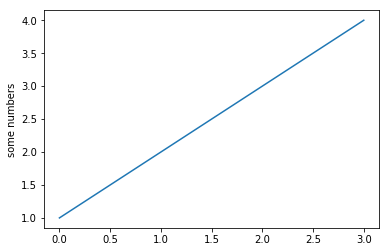

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()